### Import required packages

In [1]:
import numpy as np
import pandas as pd
import os
import sys
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import itertools 
import statistics
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")

### Open the corresponding dataset based on the file encoding type and extension

In [2]:
#Open corresponding file
filename = "tweets"
file_format = filename+'.csv'
filename = file_format
encoding = ['utf8','latin1','iso-8859-1','cp1252']
flag = False
encoding_list = len(encoding)
if file_format.endswith('.html'):
    dfs = pd.read_html(file_format)
    df  = pd.concat(dfs)
    df.to_csv(filename+".csv",index=False)
if file_format.endswith('.json'):
    df = pd.read_json(filename)
if 'parsed.csv' in filename:
    df = pd.read_csv(file_format, index_col=0 )
    flag = True
if flag != True:
#Try all the possible encoding schemes to see which one applies to the dataset
    for encoding_type in range(0,encoding_list-1):
        try:
            if file_format.endswith('.csv'):
                df = pd.read_csv(file_format, index_col=None , encoding = encoding[encoding_type])
                break
        except Exception:
            pass

In [6]:
df.head()

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,...,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### Methods to compute the descriptive statistics -  Measure of Central tendency, correlations and plots

In [22]:
class descriptiveStats:
        
    #Initialize the dataset that is used to apply the relevant cleaning opeea
    def __init__(self, df): 
        self.df = df 

    def cleanColumnData(self):
        #convert all column names into lowercase for uniformity and remove whitespaces
        df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
        df.loc[:, df.dtypes != object].replace(np.nan,'',regex = True)
    
    def stats(self):
        try:
            choice_mean = input("Do you want to calculate the mean, standard deviation and count of all columns? Press Yes or no\n")
            choice_mean.lower()
            if choice_mean == 'yes' or choice_mean == 'y' or choice_mean == '':
                df1 = pd.concat([pd.DataFrame(df.median() , columns = ["Median"] ).T,df.describe().loc[['mean','std','count','min','max']]])
                return df1
            elif choice_mean == 'no' or choice_mean == 'n':
                pass
            else:
                print("Please enter a valid choice")
        except ValueError as e:
            print("Value error {} occured".format(e))
          
    def diff(self):
        try:
            choice = input("Do you want to plot the difference between mean and median of a column? Press Yes or no\n")
            choice.lower()
            count = 0
            if choice == 'yes' or choice == 'y' or choice == '':
                # Checking the difference between the mean and the median in non-symmetric data
                for index,column in enumerate(df.loc[:, df.dtypes != object]):
                    print(index,column)
                print("\n")
                colToPlot = df.loc[:, df.dtypes != object].columns
                while True:
                    ch = input("Enter the column index you plot or Press enter to exit\n")
                    if ch.isnumeric():
                        norm_data = df[colToPlot[int(ch)]].loc[0:100]
                        norm_data.plot(kind="density", figsize=(8,8) , color="orange")
                        plt.title("Plot of the Column "+colToPlot[int(ch)])
                        # Plot black line at mean
                        plt.vlines(norm_data.mean(),ymin=0, ymax=0.02,linewidth=2.0,color="red")
                         # Plot red line at median
                        plt.vlines(norm_data.median(),ymin=0, ymax=0.02, linewidth=2.0,color="black")
                        plt.legend(loc="upper left")
                        count += 1
                    elif ch == '':
                        if count > 0:
                            print("Done Plotting")
                        else:
                            print("Exiting the function")
                        break
            elif choice == 'no' or choice == 'n':
                pass
            else:
                print("Please enter a valid choice")
        except ValueError as e:
            print("Value error {} occured".format(e))
        
    #compute correlation matrix of the numerical data    
    def corrMatrix(self):
        try:
            choice = input("Do you want to calculate the correlation matrix of all columns? Press Yes or no\n")
            choice.lower()
            if choice == 'yes' or choice == 'y' or choice == '':
                df1 = df.corr()
                return df1
            elif choice == 'no'  or choice == 'n':
                pass
            else:
                print("Please enter a valid choice")
        except ValueError as e:
            print("Value error {} occured".format(e))
    
    #compute covariance matrix of the numerical data
    def covMatrix(self):
        try:
            choice = input("Do you want to the calculate the covariance matrix of all columns? Press Yes or no\n")
            choice.lower()
            if choice == 'yes' or choice == 'y' or choice == '':
                df1 = df.cov()
                return df1
            elif choice == 'no'  or choice == 'n':
                pass
            else:
                print("Please enter a valid choice")
        except ValueError as e:
            print("Value error {} occured".format(e))

### Invoke the descriptive stats method

In [26]:
#Creating an instance for the data clean class 
stats_object = descriptiveStats(df)

### Invoke clean column data by default

In [27]:
stats_object.cleanColumnData()

### Invoke the methods to compute correlations and descriptive summary of the data.

In [28]:
stats_object.stats()

Do you want to calculate the mean, standard deviation and count of all columns? Press Yes or no
y


,rooms,price,distance,postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,lattitude,longtitude,propertycount
Median,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [29]:
stats_object.corrMatrix()

Do you want to calculate the correlation matrix of all columns? Press Yes or no



,rooms,price,distance,postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,lattitude,longtitude,propertycount
rooms,1.000000,0.465238,0.271511,0.085890,0.946755,0.611826,0.393878,0.037402,0.156229,-0.012749,0.004872,0.103235,-0.071677
price,0.465238,1.000000,-0.211384,0.044950,0.430275,0.429878,0.201803,0.032748,0.100754,-0.333306,-0.215607,0.197874,-0.059017
distance,0.271511,-0.211384,1.000000,0.481566,0.269524,0.126201,0.241835,0.060862,0.076301,0.323059,-0.100417,0.200946,-0.018140
postcode,0.085890,0.044950,0.481566,1.000000,0.089292,0.120080,0.067886,0.040664,0.042437,0.089805,-0.231027,0.362895,0.017108
bedroom2,0.946755,0.430275,0.269524,0.089292,1.000000,0.614892,0.388491,0.037019,0.154157,-0.002022,0.003447,0.106164,-0.053451
bathroom,0.611826,0.429878,0.126201,0.120080,0.614892,1.000000,0.307518,0.036333,0.147558,0.167955,-0.059183,0.106531,-0.032887
car,0.393878,0.201803,0.241835,0.067886,0.388491,0.307518,1.000000,0.037829,0.104373,0.128702,-0.009020,0.047213,-0.009617
landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037829,1.000000,0.354530,0.044474,0.025318,-0.002582,-0.018195
buildingarea,0.156229,0.100754,0.076301,0.042437,0.154157,0.147558,0.104373,0.354530,1.000000,0.067811,0.017155,-0.002143,-0.024523
yearbuilt,-0.012749,-0.333306,0.323059,0.089805,-0.002022,0.167955,0.128702,0.044474,0.067811,1.000000,0.091592,-0.022175,0.022420


In [30]:
stats_object.covMatrix()

Do you want to the calculate the covariance matrix of all columns? Press Yes or no



,rooms,price,distance,postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,lattitude,longtitude,propertycount
rooms,0.940770,2.849444e+05,1.787864,9.082629e+00,0.891230,0.425279,0.382485,1.221813e+02,6.103778e+01,-4.694370e-01,0.000424,0.011964,-3.078539e+02
price,284944.435126,4.114801e+11,-920363.529407,3.204615e+06,268308.351521,196627.913784,131425.466129,8.040162e+07,3.064955e+07,-8.225848e+06,-12899.793808,15593.959965,-1.700760e+08
distance,1.787864,-9.203635e+05,46.089061,3.564320e+02,1.820819,0.629642,1.678381,1.382438e+03,2.174114e+02,8.375633e+01,-0.062468,0.166393,-5.453381e+02
postcode,9.082629,3.204615e+06,356.431993,1.188621e+04,9.832646,9.765642,7.731578,1.478868e+04,2.038161e+03,3.864271e+02,-2.337327,4.887005,8.259377e+03
bedroom2,0.891230,2.683084e+05,1.820819,9.832646e+00,0.961752,0.436677,0.385806,1.239541e+02,6.031971e+01,-7.614138e-02,0.000305,0.012523,-2.274236e+02
bathroom,0.425279,1.966279e+05,0.629642,9.765642e+00,0.436677,0.524483,0.225790,9.002842e+01,4.368815e+01,4.608070e+00,-0.003873,0.009282,-1.033393e+02
car,0.382485,1.314255e+05,1.678381,7.731578e+00,0.385806,0.225790,1.021658,1.295039e+02,4.256199e+01,4.751541e+00,-0.000829,0.005748,-4.223906e+01
landsize,122.181295,8.040162e+07,1382.437825,1.478868e+04,123.954130,90.028421,129.503912,1.155213e+07,1.711919e+05,1.758897e+03,7.542143,-1.025878,-2.675078e+05
buildingarea,61.037782,3.064955e+07,217.411383,2.038161e+03,60.319708,43.688148,42.561988,1.711919e+05,1.610153e+05,2.283379e+02,0.635043,-0.105336,-4.245582e+04
yearbuilt,-0.469437,-8.225848e+06,83.756327,3.864271e+02,-0.076141,4.608070,4.751541,1.758897e+03,2.283379e+02,1.393393e+03,0.308261,-0.099138,3.600521e+03


Do you want to plot the difference between mean and median of a column? Press Yes or no
y
0 rooms
1 price
2 distance
3 postcode
4 bedroom2
5 bathroom
6 car
7 landsize
8 buildingarea
9 yearbuilt
10 lattitude
11 longtitude
12 propertycount


Enter the column index you plot or Press enter to exit
6
Enter the column index you plot or Press enter to exit

Done Plotting


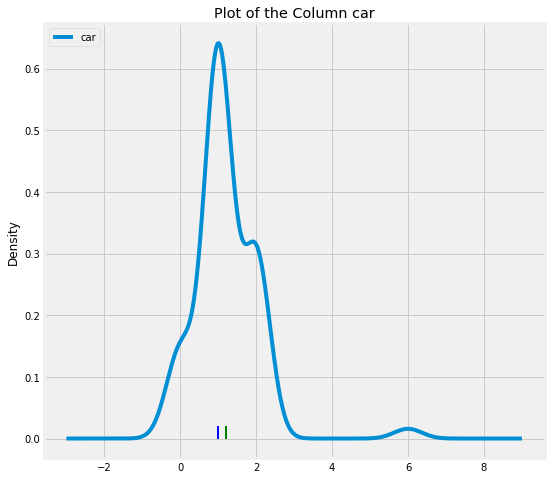

In [21]:
stats_object.diff()

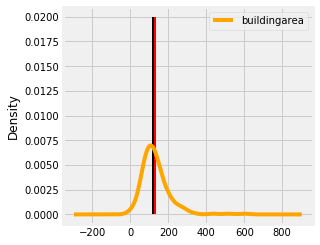

In [14]:
# Checking the difference between the mean and the median in non-symmetric data
norm_data = df['buildingarea'].loc[0:500]
norm_data.plot(kind="density", figsize=(4,4) , color = "orange")
# Plot black line at mean
plt.vlines(norm_data.mean(),ymin=0, ymax=0.02,linewidth=2.0,color="red")
 # Plot red line at median
plt.vlines(norm_data.median(),  ymin=0, ymax=0.02, linewidth=2.0,color="black")
plt.legend(loc="upper right")